**Student Information**

Môn học: Toán Ứng dụng và Thống kê

Họ tên: Bế Lã Anh Thư

Lớp: 22CLC02

MSSV: 22127402

In [31]:
# import các thư viện
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import IPython.display as I_dis

# a) Xây dựng ma trận chuyển trạng thái P của xích Markov
Từ dữ liệu đã cho, ta xây dựng được vector A và B lần lượt là số phòng học ở các trạng thái trong năm 2020 và 2021:
$$ A = [34, 12, 3, 1] $$
$$ B = [26, 17, 5, 2] $$

Và ma trận X:
$$ X = \begin{bmatrix} x_1 & x_2 & x_3 & x_4 \cr y_1 & y_2 & y_3 & y_4 = 0 \end{bmatrix}$$

Với:
- $x_i$ là số phòng học giữ nguyên trạng thái $i$.
- $y_i$ là số phòng học chuyển từ trạng thái $i$ sang trạng thái $(i + 1)$.
- $i \in (1, 4)$

Từ đó ta có được biểu thức:
- $ x_i = B_i - A_{i - 1} + x_{i - 1} $ *(1)*
- $ y_i = A_i - x_i $ *(2)*

Khi đó, ta tính được ma trận chuyển trạng thái P của xích Markov:
$$ P = \begin{bmatrix} \frac{x_1}{34} & 0 & 0 & 0 \cr \frac{y_1}{34} & \frac{x_2}{12} & 0 & 0 \cr 0 & \frac{y_2}{12} & \frac{x_3}{3} & 0 \cr 0 & 0 & \frac{y_3}{3} & \frac{x_4}{1} \end{bmatrix}$$

In [32]:
# Số lượng phòng học ở các trạng thái 
state_2020 = [34, 12, 3, 1]
state_2021 = [26, 17, 5, 2]

def find_X(A, B):
    ''' 
        Tìm ma trận X, size 2x4, với dòng đầu là x_i, dòng sau là y_i.
        A: vector trạng thái các phòng học năm 2020
        B: vector trạng thái các phòng học năm 2021
        Return: ma trận X size 2x4
    '''
    n = len(A)
    X = [[0 for _ in range(n)], [0 for _ in range(n)]]
    
    X[0][0] = 26 # có 24 phòng học giữ nguyên trạng thái 1 
    X[0][3] = 1 # có 1 phòng học giữ nguyên trạng thái 4

    for i in range(1, n):
        X[0][i] = B[i] - A[i - 1] + X[0][i-1] # x_i = B_i - A_(i-1) + X_(i-1)
        X[1][i-1] = A[i-1] - X[0][i-1] # y_i = A_i - x_i

    return X

# Tìm ma trận X số phòng chuyển trạng thái
result = find_X(state_2020, state_2021)

# Xây dựng ma trận chuyển trạng thái P dựa trên các giá trị đã tính
P = [[0]* (len(state_2020)) for _ in range(len(state_2020))]

for i in range(len(result[0])):
    P[i][i] = result[0][i] / state_2020[i]
    if i != 3:
        P[i + 1][i] = result[1][i] / state_2020[i]


for i in range(len(result[0])):
    print(f'Số phòng giữ nguyên trạng thái {i + 1}: {result[0][i]}')
    if i != 3:
        print(f'Số phòng chuyển từ trạng thái {i + 1} sang trạng thái {i + 2}: {result[1][i]}')

print('---------------------------------')
I_dis.display(I_dis.Math('P = ' + sp.latex(sp.Matrix(P))))


Số phòng giữ nguyên trạng thái 1: 26
Số phòng chuyển từ trạng thái 1 sang trạng thái 2: 8
Số phòng giữ nguyên trạng thái 2: 9
Số phòng chuyển từ trạng thái 2 sang trạng thái 3: 3
Số phòng giữ nguyên trạng thái 3: 2
Số phòng chuyển từ trạng thái 3 sang trạng thái 4: 1
Số phòng giữ nguyên trạng thái 4: 1
---------------------------------


<IPython.core.display.Math object>

# b) Xác định vector phân phối xác suất ban đầu $\pi_0$
Giả sử năm 2021 là năm bắt đầu của xích Markov, ta có số liệu năm 2021 như sau:

| Trạng thái | Số phòng học |
| :----: | :----: |
| 1 | 26 |
| 2 | 17 |
| 3 | 5 |
| 4 | 2 |

Tổng số phòng học: 50.

Xác suất cho từng trạng thái:
- Trạng thái 1: $\pi_0(1) = \frac{26}{50}$
- Trạng thái 2: $\pi_0(2) = \frac{17}{50}$
- Trạng thái 3: $\pi_0(3) = \frac{5}{50}$
- Trạng thái 4: $\pi_0(4) = \frac{2}{50}$

Vector phân phối xác suất ban đầu $\pi_0$ cho năm 2021:
$$ \pi_0 = (\frac{26}{50}, \frac{17}{50}, \frac{5}{50}, \frac{2}{50}) = (0.52,0.34,0.10,0.04) $$

In [33]:
# Tổng số phòng học
total = 50

pi_0 = [[count/total] for count in state_2021]

I_dis.display(I_dis.Math(r'\pi_0 = ' + sp.latex(sp.Matrix(pi_0))))

<IPython.core.display.Math object>

# c) Dự báo sự xuống cấp về cơ sở vật chất (CSVC) của các phòng học tòa nhà I trong 15 năm tới

Ta có $\pi_0$ là vector phân phối xác suất ở thời điểm ban đầu. 

Xác suất tại thời điểm $n$:
$$\pi_n = P^n \cdot \pi_0$$

Số phòng học ở trạng thái i tại thời điểm $n:$ 
$$ \pi_n(i) \times 50 $$

Với $n \in (1, 15)$ và $i \in (1, 4)$

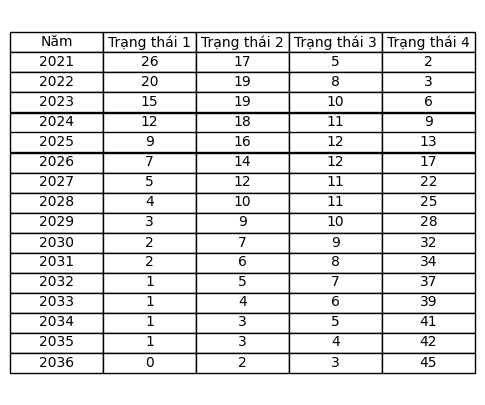

In [34]:
def multiply_matrix_matrix(A, B):
    ''' 
        Nhân hai ma trận
        A: matrix size nxm
        B: matrix size mxp
        return: matrix size nxp
    '''
    # Kiểm tra xem số cột của A có bằng số hàng của B không
    if len(A[0]) != len(B):
        raise ValueError("Số cột của A phải bằng số hàng của B để nhân ma trận.")
    
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

def matrix_pow(A, power):
    '''
        calculate the nth power of matrix A using exponentiation by squaring
        A: ma trận size nxn
        power: số mũ
    '''

    # tạo ma trận đơn vị size nxn
    result = [[1 if i == j else 0 for j in range(len(A))] for i in range(len(A))]
    base = A

    while power > 0:
        if power % 2 == 1:
            result = multiply_matrix_matrix(result, base)
        base = multiply_matrix_matrix(base, base)
        power //= 2
    
    return result

def show_table(df):
    # Vẽ bảng 
    fig, ax = plt.subplots(figsize=(5, 5))

    ax.axis('tight')
    ax.axis('off')

    # Tạo bảng
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    # Định dạng bảng
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    plt.show()


# Số năm dự báo
years = 30

# khởi tạo các biến chứa giá trị trạng thái qua các năm
years_display = [2021]
state_1 = [26]
state_2 = [17]
state_3 = [5]
state_4 = [2]

for year in range(1, years + 1):
    # Tìm ma trận P^year cho năm year
    P_n = matrix_pow(P, year)

    # Tìm vector phân phối xác suất cho năm year
    pi_n = multiply_matrix_matrix(P_n, pi_0)

    # tính số phòng ở mỗi trạng thái
    room_distribution = [int(round(pi_n[i][0] * total, 0)) for i in range(len(pi_n))]

    # Điều chỉnh phân phối để tổng số phòng bằng 50
    if sum(room_distribution) < total:
        room_distribution[3] += 1
    elif sum(room_distribution) > total:
        room_distribution[3] -= 1

    # Lưu kết quả 
    years_display.append(2021 + year)
    state_1.append(room_distribution[0])
    state_2.append(room_distribution[1])
    state_3.append(room_distribution[2])
    state_4.append(room_distribution[3])

     # Kiểm tra nếu tất cả các phòng đều ở trạng thái 4 (xấu)
    if room_distribution == [0, 0, 0, total]:
        break

# Tạo DataFrame từ dữ liệu
data = {
    "Năm": years_display,
    "Trạng thái 1": state_1,
    "Trạng thái 2": state_2,
    "Trạng thái 3": state_3,
    "Trạng thái 4": state_4
}

df = pd.DataFrame(data)

df_15_years = df.head(16)

show_table(df_15_years)

# d) Thời điểm phải phá hủy để xây lại/trùng tu tòa nhà I (tất cả các phòng học đều ở trạng thái CSVC xấu)

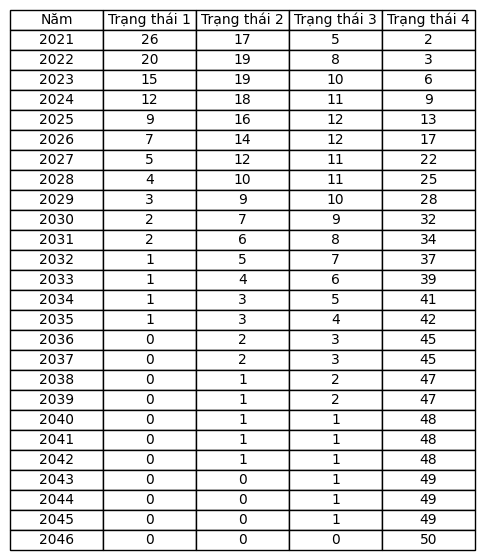

Tất cả các phòng học sẽ ở trạng thái xấu vào năm 2046


In [35]:
show_table(df)

print(f"Tất cả các phòng học sẽ ở trạng thái xấu vào năm {years_display[-1]}")

# e) Xác định tuổi thọ của tòa nhà I

Theo dữ liệu đề bài, tòa nhà I được xây dựng hoàn tất và đưa vào sử dụng từ năm 2000. 

Theo tính toán câu d, tất cả phòng học sẽ ở trạng thái xấu vào năm 2046, tức phải phá hủy để xây lại/trùng tu.

Vậy tuổi thọ của tòa nhà I:
$$2046 - 2000 = 46 (năm)$$